### Relationship between different market types

In [17]:
import tradingeconomics as te
import pandas as pd
from datetime import datetime, timedelta, date
from functools import reduce
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale = 1)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline 

In [18]:
te.login() # Signup for a free API key at https://developer.tradingeconomics.com/

In [19]:
symbols = ['EURUSD:CUR', 'BTCUSD:CUR', 'INDU:IND', 'cl1:COM', 'XAUUSD:CUR']
startDate = '2021-01-01'
endDate = str((datetime.now() + timedelta(days=1)).date())
stocksdf = te.fetchMarkets(symbol= symbols, initDate=startDate, endDate = endDate , output_type='df')[['symbol','close']] 

In [20]:
euro = stocksdf[stocksdf['symbol']=='EURUSD:CUR'].rename(columns={'close':'EURUSD'}, inplace=False)
btc = stocksdf[stocksdf['symbol']=='BTCUSD:CUR'].rename(columns={'close':'BTCUSD'}, inplace=False)
indu = stocksdf[stocksdf['symbol']=='INDU:IND'].rename(columns={'close':'US30'}, inplace=False)
cl1 = stocksdf[stocksdf['symbol']=='CL1:COM'].rename(columns={'close':'Crude Oil '}, inplace=False)
gold = stocksdf[stocksdf['symbol']=='XAUUSD:CUR'].rename(columns={'close':'Gold'}, inplace=False)

euro['date'] = pd.DatetimeIndex(euro.index.tolist())
btc['date'] = pd.DatetimeIndex(btc.index.tolist())
indu['date'] = pd.DatetimeIndex(indu.index.tolist())
cl1['date'] = pd.DatetimeIndex(cl1.index.tolist())
gold['date'] = pd.DatetimeIndex(gold.index.tolist())

data_frames_to_merge = [euro, btc, indu,cl1, gold]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['date'], how='outer'), data_frames_to_merge)
df_merged = df_merged[df_merged.columns.drop(list(df_merged.filter(regex='sym')))]
df_merged.set_index('date', inplace=True)
df_merged = df_merged.sort_index(ascending=True)

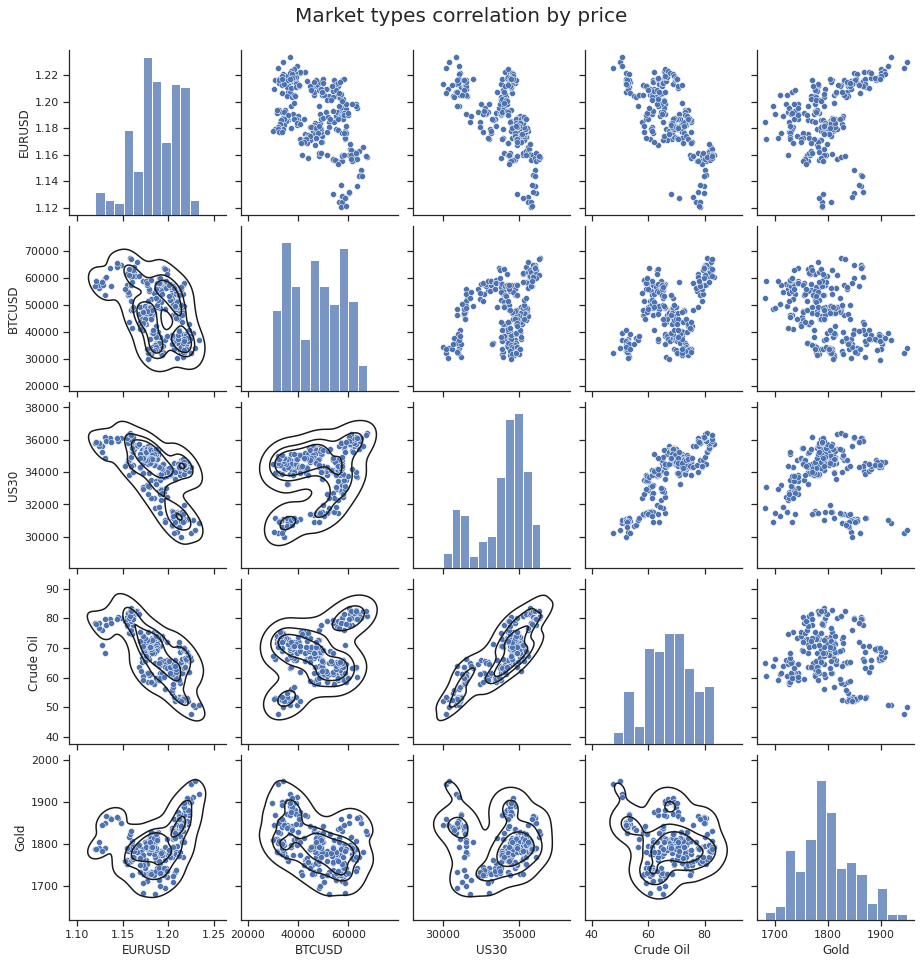

In [21]:
%config InlineBackend.figure_format = 'png'
g= sns.pairplot(df_merged, palette='husl', height=2.6)
g.map_lower(sns.kdeplot, levels=4, color=".1")
g.fig.suptitle("Market types correlation by price", y=1.03, size=20)
plt.show()


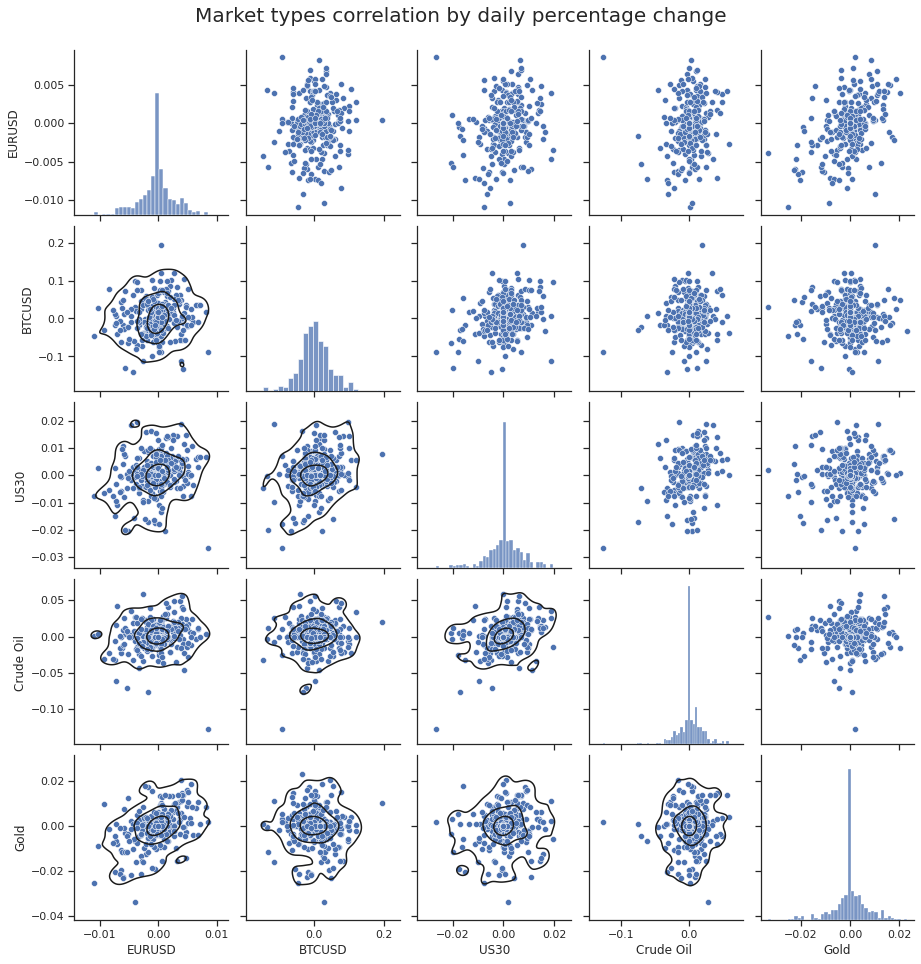

In [23]:
%config InlineBackend.figure_format = 'png'
g= sns.pairplot(df_merged.pct_change(), palette='husl', height=2.6)
g.map_lower(sns.kdeplot, levels=4, color=".1")
g.fig.suptitle("Market types correlation by daily percentage change", y=1.03, size=20)
plt.show()

In [ ]:
# fabio.guerreiro@tradingeconomics.com 